# Nicolas's Original Code

ValueError: output array is read-only

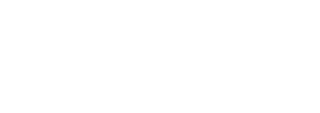

In [39]:
# ----------------------------------------------------------------------------
# Title:   Scientific Visualisation - Python & Matplotlib
# Author:  Nicolas P. Rougier
# License: BSD
# ----------------------------------------------------------------------------
# Illustrate the use of TextPath and access to raw vertices
# ----------------------------------------------------------------------------
import matplotlib.pyplot as plt
from matplotlib.textpath import TextPath
from matplotlib.patches import PathPatch

fig = plt.figure(figsize=(4.25, 2))
ax = fig.add_axes([0, 0, 1, 1], aspect=1, xlim=[-40, 40], ylim=[-1, 25])
ax.axis("off")

text = [
    "Beautiful is better than ugly.",
    "Explicit is better than implicit.",
    "Simple is better than complex.",
    "Complex is better than complicated.",
    "Flat is better than nested.",
    "Sparse is better than dense.",
    "Readability counts.",
]

y = 0
size = 6
xfactor = 1 / 50
yfactor = 1 / 120

for i, line in enumerate(text[::-1]):
    path = TextPath((0, 0), line, size=size)
    V = path.vertices
    xmin, xmax = V[:, 0].min(), V[:, 0].max()
    ymin, ymax = V[:, 1].min(), V[:, 1].max()

    # X centering
    V[:, 0] -= (xmax + xmin) / 2

    # Moving whole text at y coordinates
    V[:, 1] += y

    # Rescaling along y
    V[:, 1] *= 1 - (V[:, 1] * yfactor)

    # Rescaling along x
    V[:, 0] *= 1 - (V[:, 1] * xfactor)

    # Update interlines
    y += size * (1 - ymin * yfactor)

    # Display
    patch = PathPatch(path, facecolor="%.2f" % (i / 10), linewidth=0, clip_on=False)
    ax.add_artist(patch)

plt.savefig("text-starwars.pdf")
plt.show()

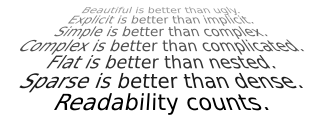

In [61]:
# ----------------------------------------------------------------------------
# Title:   Scientific Visualisation - Python & Matplotlib
# Author:  Nicolas P. Rougier
# License: BSD
# ----------------------------------------------------------------------------
# Illustrate the use of TextPath and access to raw vertices
# ----------------------------------------------------------------------------
import matplotlib.pyplot as plt
from matplotlib.textpath import TextPath
from matplotlib.patches import PathPatch
from matplotlib.path import Path

fig = plt.figure(figsize=(4.25, 2))
ax = fig.add_axes([0, 0, 1, 1], aspect=1, xlim=[-40, 40], ylim=[-1, 25])
ax.axis("off")

text = [
    "Beautiful is better than ugly.",
    "Explicit is better than implicit.",
    "Simple is better than complex.",
    "Complex is better than complicated.",
    "Flat is better than nested.",
    "Sparse is better than dense.",
    "Readability counts.",
]

y = 0
size = 6
xfactor = 1 / 50
yfactor = 1 / 120

for i, line in enumerate(text[::-1]):
    path = TextPath((0, 0), line, size=size)
    V = path.vertices
    codes = path.codes
    xmin, xmax = V[:, 0].min(), V[:, 0].max()
    ymin, ymax = V[:, 1].min(), V[:, 1].max()

    # New Path
    # X centering
    Px = V[:, 0] - (xmax + xmin) / 2

    # Moving whole text at y coordinates
    Py = V[:, 1] + y

    # Rescaling along y
    Py *= 1 - (Py * yfactor)

    # Rescaling along x
    Px *= 1 - (Py * xfactor)

    # Update interlines
    y += size * (1 - ymin * yfactor)

    # new path
    path_new = Path(np.array([Px, Py]).T, codes=codes)
    
    # Display
    patch = PathPatch(path_new, facecolor="%.2f" % (i / 10), linewidth=0, clip_on=False)
    ax.add_artist(patch)

plt.savefig("text-starwars.pdf")
plt.show()

# Jehyun's part by part

In [1]:
import matplotlib as mpl
mpl.__version__

'3.5.0'

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.textpath import TextPath
from matplotlib.patches import PathPatch

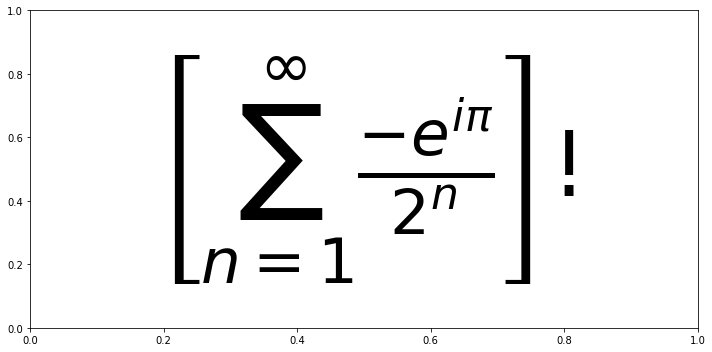

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))

eq = r"$\left[\sum_{n=1}^\infty\frac{-e^{i\pi}}{2^n}\right]$!"
txt = ax.text(0.5, 0.5, eq, ha="center", va="center", fontsize=90)

fig.tight_layout()
fig.savefig("94_rougier02_01.png")

In [4]:
eq_path = TextPath((0, 0), eq, size=90)
V = eq_path.vertices
xmin, xmax = V[:, 0].min(), V[:, 0].max()
ymin, ymax = V[:, 1].min(), V[:, 1].max()
print(xmin, xmax, ymin, ymax)

0.0 419.5953767578125 -86.91370141006101 139.5


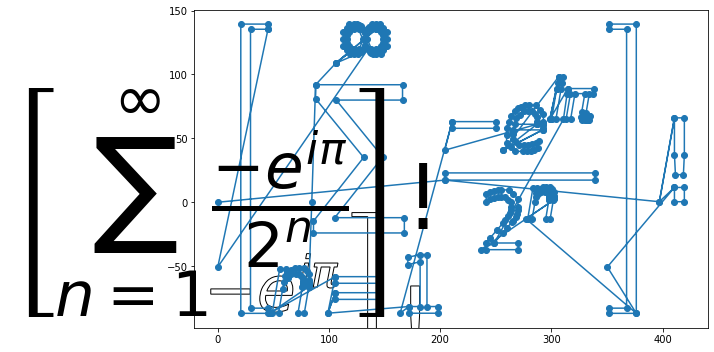

In [6]:
from matplotlib.transforms import IdentityTransform

eq_patch = PathPatch(eq_path, ec="k", fc="w", transform=IdentityTransform())

fig, ax = plt.subplots(figsize=(10, 5))

# text (original)
ax.text(0.5, 0.5, eq, ha="center", va="center", fontsize=90)

# vertices from Path
ax.plot(V[:, 0], V[:, 1], "o-")

# Patch
ax.add_artist(eq_patch)

fig.tight_layout()
fig.savefig("94_rougier02_02.png")

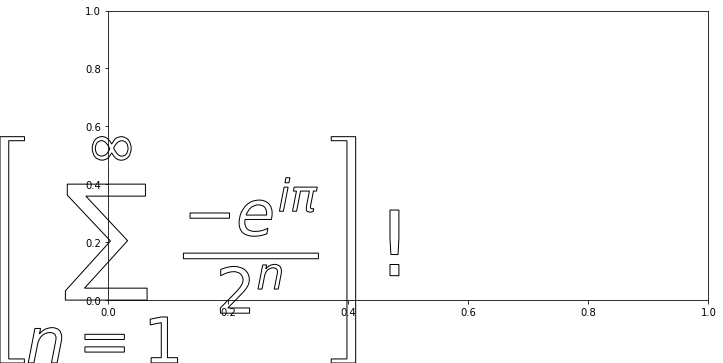

In [7]:
from matplotlib.offsetbox import AuxTransformBox

fig, ax = plt.subplots(figsize=(10, 5))

eq_patch = PathPatch(eq_path, ec="k", fc="w", transform=IdentityTransform())
offsetbox = AuxTransformBox(IdentityTransform()) 
offsetbox.add_artist(eq_patch)

ax.add_artist(offsetbox)

fig.tight_layout()
fig.savefig("94_rougier02_04.png")

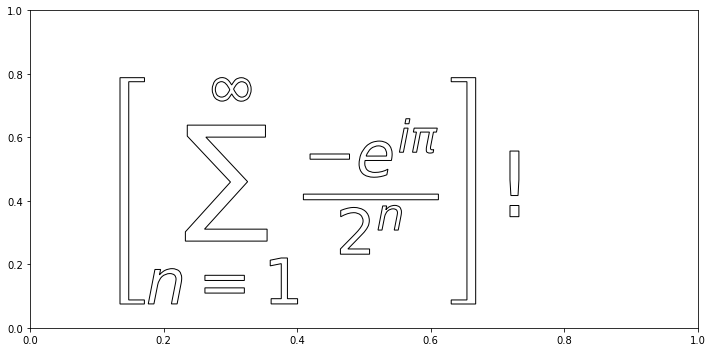

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))

eq_patch = PathPatch(eq_path, ec="k", fc="w", transform=IdentityTransform())
offsetbox = AuxTransformBox(IdentityTransform()) 
offsetbox.add_artist(eq_patch)
offsetbox.set_offset((120, 48))

ax.add_artist(offsetbox)

fig.tight_layout()
fig.savefig("94_rougier02_05.png")

before centering: [0.50, 420.10, -86.41, 140.00]
after centering: [-209.80, 209.80, -113.21, 113.21]


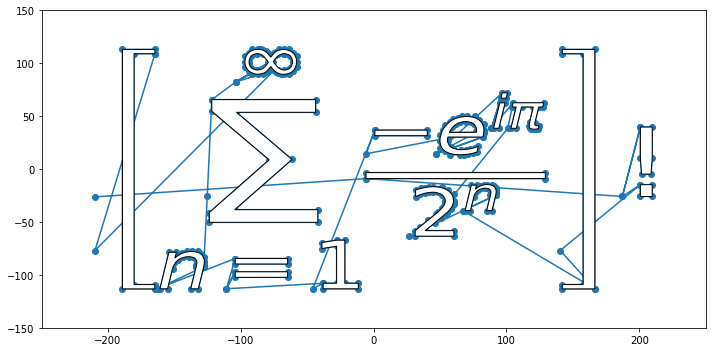

In [24]:
from matplotlib.path import Path

eq_path = TextPath((0.5, 0.5), eq, size=90)
Vc = eq_path.vertices  # vertices coordinates
codes = eq_path.codes  # codes: Path parts

# ranges of coordinates
xcmin, xcmax = Vc[:, 0].min(), Vc[:, 0].max()
ycmin, ycmax = Vc[:, 1].min(), Vc[:, 1].max()
print(f"before centering: [{xcmin:.2f}, {xcmax:.2f}, {ycmin:.2f}, {ycmax:.2f}]")

# X centering
Px = Vc[:, 0] - (xcmax + xcmin)/2

# Y centering
Py = Vc[:, 1] - (ycmax + ycmin)/2

# coordinates check: centering
xpmin, xpmax = Px.min(), Px.max()
ypmin, ypmax = Py.min(), Py.max()
print(f"after centering: [{xpmin:.2f}, {xpmax:.2f}, {ypmin:.2f}, {ypmax:.2f}]")

# create new Path
path_new = Path(np.array([Px, Py]).T, codes=codes)  

# convert Path to Patch
patch = PathPatch(path_new, facecolor="w", ec="k", zorder=2) 

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(Px, Py, "o-")  # Path vetices
ax.add_artist(patch)   # Patch from Path
ax.set_xlim((-250, 250))
ax.set_ylim((-150, 150))

fig.tight_layout()
fig.savefig("94_rougier02_06.png")

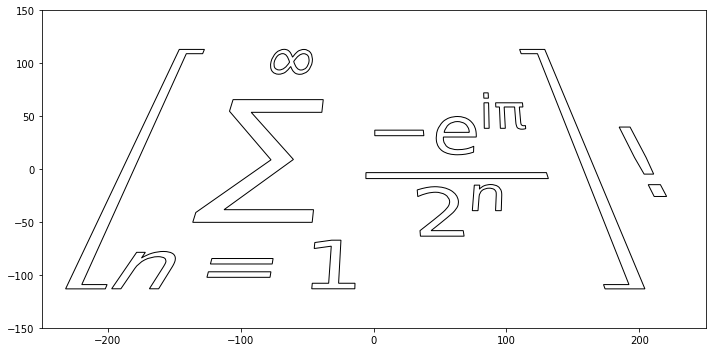

In [26]:
eq_path = TextPath((0.5, 0.5), eq, size=90)
Vc = eq_path.vertices
codes = eq_path.codes
xcmin, xcmax = Vc[:, 0].min(), Vc[:, 0].max()
ycmin, ycmax = Vc[:, 1].min(), Vc[:, 1].max()

# X centering
Px = Vc[:, 0] - (xcmax + xcmin)/2

# Y centering
Py = Vc[:, 1] - (ycmax + ycmin)/2

# X rescaling
xfactor = 0.002
Px *= 1 - (Py * xfactor)

# New Path
path_new = Path(np.array([Px, Py]).T, codes=codes)

# Display
patch = PathPatch(path_new, facecolor="w", ec="k") 

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim((-250, 250))
ax.set_ylim((-150, 150))

ax.add_artist(patch)

fig.tight_layout()
fig.savefig("94_rougier02_07.png")

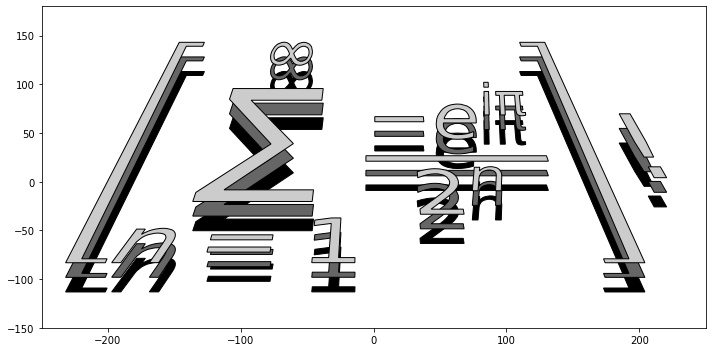

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim((-250, 250))
ax.set_ylim((-150, 180))

for i in range(3):
    eq_path = TextPath((0.5, 0.5), eq, size=90)
    Vc = eq_path.vertices
    codes = eq_path.codes
    xcmin, xcmax = Vc[:, 0].min(), Vc[:, 0].max()
    ycmin, ycmax = Vc[:, 1].min(), Vc[:, 1].max()

    # X centering
    Px = Vc[:, 0] - (xcmax + xcmin)/2

    # Y centering
    Py = Vc[:, 1] - (ycmax + ycmin)/2

    # X rescaling
    xfactor = 0.002
    Px *= 1 - (Py * xfactor)
    
    # Y shifting
    Py += i * 15

    # New Path
    path_new = Path(np.array([Px, Py]).T, codes=codes)
    
    # Display
    patch = PathPatch(path_new, facecolor=f"{i*0.4}", ec="k") 


    ax.add_artist(patch)

fig.tight_layout()
fig.savefig("94_rougier02_08.png")

In [28]:
text = [
    "Beautiful is better than ugly.",
    "Explicit is better than implicit.",
    "Simple is better than complex.",
    "Complex is better than complicated.",
    "Flat is better than nested.",
    "Sparse is better than dense.",
    "Readability counts.",
]

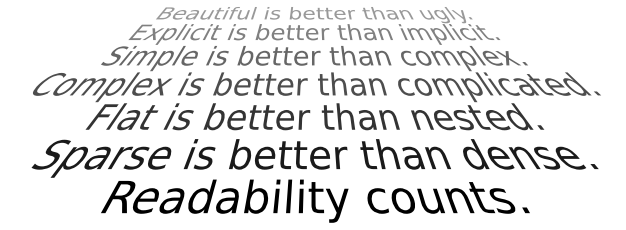

In [32]:
fig = plt.figure(figsize=(8.5, 4))
ax = fig.add_axes([0, 0, 1, 1], aspect=1, xlim=[-40, 40], ylim=[-1, 25])
ax.axis("off")

y = 0
size = 6
xfactor = 1 / 50
yfactor = 1 / 120

for i, line in enumerate(text[::-1]):
    path = TextPath((0, 0), line, size=size)
    V = path.vertices
    codes = path.codes
    xmin, xmax = V[:, 0].min(), V[:, 0].max()
    ymin, ymax = V[:, 1].min(), V[:, 1].max()

    # New Path
    # X centering
    Px = V[:, 0] - (xmax + xmin) / 2

    # Moving whole text at y coordinates
    Py = V[:, 1] + y

    # Rescaling along y
    Py *= 1 - (Py * yfactor)

    # Rescaling along x
    Px *= 1 - (Py * xfactor)

    # Update interlines
    y += size * (1 - ymin * yfactor)

    # new path
    path_new = Path(np.array([Px, Py]).T, codes=codes)
    
    # Display
    patch = PathPatch(path_new, facecolor="%.2f" % (i / 10), linewidth=0, clip_on=False)
    ax.add_artist(patch)
    
plt.savefig("text-starwars_org.png")

In [115]:
import colorsys

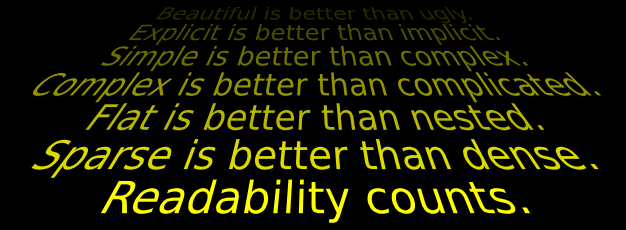

In [118]:
fig = plt.figure(figsize=(8.5, 4), facecolor="k")
ax = fig.add_axes([0, 0, 1, 1], aspect=1, xlim=[-40, 40], ylim=[-1, 25])
ax.axis("off")

y = 0
size = 6
xfactor = 1 / 50
yfactor = 1 / 120
c = (1, 1, 0) # yellow

for i, line in enumerate(text[::-1]):
    path = TextPath((0, 0), line, size=size)
    V = path.vertices
    codes = path.codes
    xmin, xmax = V[:, 0].min(), V[:, 0].max()
    ymin, ymax = V[:, 1].min(), V[:, 1].max()

    # New Path
    # X centering
    Px = V[:, 0] - (xmax + xmin) / 2

    # Moving whole text at y coordinates
    Py = V[:, 1] + y

    # Rescaling along y
    Py *= 1 - (Py * yfactor)

    # Rescaling along x
    Px *= 1 - (Py * xfactor)

    # Update interlines
    y += size * (1 - ymin * yfactor)

    # new path
    path_new = Path(np.array([Px, Py]).T, codes=codes)
    
    # Display
    hls = list(colorsys.rgb_to_hls(*c))
    hls[1] -= 0.07 * i
    rgb = colorsys.hls_to_rgb(*hls)
    patch = PathPatch(path_new, facecolor=rgb, edgecolor="none", linewidth=0, clip_on=False)
    ax.add_artist(patch)

plt.savefig("text-starwars.png")